<a href="https://colab.research.google.com/github/NavaponS/Sentiment-Analysis-of-Musical-Instrument-Reviews-on-Amazon/blob/main/Sentiment_Analysis_of_Musical_Instrument_Reviews_on_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> เช็คข้อมูลเบื้องต้น

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Project/NLP/Data/Musical_instruments_reviews.csv')
print ("The shape of the  data is :"+ str(df.shape))
print (df.info())

The shape of the  data is :(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
None


### **Dataset Details**
**Description of columns in the file:**
* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 1384719342
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)

> จากข้อมูลเราสามารถทำ **sentiment analysis** จากข้อมูลนี้ได้ 🤔

> **การวิเคราะห์ความรู้สึก (Sentiment Analysis)** สามารถระบุอารมณ์หรือท่าทีของข้อความได้โดยอัตโนมัติ positive negative หรือ neutral มันช่วยให้ธุรกิจเข้าใจความรู้สึกของลูกค้าโดยการวิเคราะห์ข้อมูลตอบกลับจากแพลตฟอร์มต่างๆ

In [4]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


# **Cleaning and Preparing Data**

> รวมคอลัมน์ reviewText กับ summary เข้าด้วยกัน และลบข้อมูลที่ไม่เกี่ยวข้องออก

In [5]:
df['reviews']=df['reviewText']+df['summary']
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [6]:
df=df.drop(['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime', 'reviewText', 'summary'], axis=1)
df.head()

,overall,reviews
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...


> ลบแถวที่มีข้อมูลสูญหายออก

In [7]:
#Checking for null values
df.isnull().sum()

,0
overall,0
reviews,7


In [8]:
# Drop rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

,0
overall,0
reviews,0


> แปลงข้อมูล overall

*   คะแนน 1-2 : negative
*   คะแนน    3 : neutral
*   คะแนน 4-5 : positive






In [9]:
def categorize_overall(rating):
  if rating >= 4:
    return 'positive'
  elif rating == 3:
    return 'neutral'
  else:
    return 'negative'

df['overall'] = df['overall'].apply(categorize_overall)

df = df.rename(columns={'overall': 'sentiment'})
df.head()

,sentiment,reviews
0,positive,"Not much to write about here, but it does exac..."
1,positive,The product does exactly as it should and is q...
2,positive,The primary job of this device is to block the...
3,positive,Nice windscreen protects my MXL mic and preven...
4,positive,This pop filter is great. It looks and perform...


# **Preprocessing**
> ทำการลบ

* ตัวเลข
* punctuation
* เว้นวรรคเกิน
* คำที่ไม่ใช่ภาษาอังกฤษ
* stop words
* ทำ Lemmatizing

> **nltk stop words** มักมีคำว่า not, hasn't ,wouldn't ถ้าตัดออกไปมีผลกับ sentiment ที่เป็นเชิง Negative แน่นอน ดังนั้นลบเองแบบ traditional ดีกว่า

In [10]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each',
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above',
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from',
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs',
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [11]:
import nltk
import string
import re
nltk.download('punkt_tab')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#function for removing number
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl="", string=text)
    return without_number

#function for removing punctuation
def remove_punctuation(text):
    translator = str.maketrans("","", string.punctuation)
    return text.translate(translator)

#function for removing extra white_spaces
def remove_extra_white_spaces(text):
    white_space_pattern = r'\s+'
    without_sc = re.sub(pattern=white_space_pattern, repl=" ", string=text)
    return without_sc

#function for removing non english
def remove_nonEng(text):
    eng_pattern = r'[^a-zA-Z]'
    without_nonEng = re.sub(pattern=eng_pattern, repl=" ", string=text)
    return without_nonEng

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return " ".join(filtered_tokens)

#function for Lemmatization
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)


df['reviews'] = df['reviews'].apply(lambda x: remove_numbers(x)) #remove number
df['reviews'] = df['reviews'].apply(lambda x: remove_punctuation(x)) #remove punc
df['reviews'] = df['reviews'].apply(lambda x: remove_extra_white_spaces(x)) #remove_extra_white_spaces
df['reviews'] = df['reviews'].apply(lambda x: remove_nonEng(x)) #remove_nonEng
df['reviews'] = df['reviews'].apply(lambda x: remove_stopwords(x)) #remove stopwords
df['reviews'] = df['reviews'].apply(lambda x: lemmatizing(x)) #Lemmatization

df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,sentiment,reviews
0,positive,Not much write but exactly supposed filter pop...
1,positive,product exactly quite affordableI not realized...
2,positive,primary job device block breath would otherwis...
3,positive,Nice windscreen protects MXL mic prevents pop ...
4,positive,pop filter great look performs like studio fil...


In [12]:
from collections import Counter

label_counts = df.groupby('sentiment')['sentiment'].count()
label_counts

,sentiment
sentiment,
negative,467
neutral,772
positive,9015


> ทำ label encoder ให้ label กลายเป็นตัวเลข

2 - positive, 1 - negative, 0 - neutral

In [13]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# calling the label encoder function
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

df['sentiment'].unique()

array([2, 1, 0])

แต่ละ class มีจำนวนต่างกันมากควรทำ SMOTE 😢

In [14]:
df['sentiment'].value_counts()

,count
sentiment,
2,9015
1,772
0,467


# **vectorizing**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(df['reviews'])

> กำหนด X y

In [16]:
y=df['sentiment']

> แก้ปัญหา imbalance data โดยการทำ SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 9015, 1: 772, 0: 467})
Resampled dataset shape Counter({2: 9015, 1: 9015, 0: 9015})


In [18]:
import pandas as pd
y_res_df = pd.DataFrame.from_dict(Counter(y_res), orient='index', columns=['count'])
y_res_df.index.name = 'sentiment'
y_res_df

,count
sentiment,
2,9015
1,9015
0,9015


> shuffle data

In [19]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=42)
print(df)

      sentiment                                            reviews
119           2  hard not love cord carry electron way end Not ...
8774          2  dont know if top headstock bottom body know gu...
3610          1  bought strap use acoustic dreadnought guitar w...
1923          2  tough unit easy set lock tight material robust...
3065          2  cheap easy use cut sound Ideal beginner living...
...         ...                                                ...
5736          2  play teach classical guitar needed good digita...
5193          2  Excellent equipment price paid cant beat got u...
5392          2  Yes ie every bit good Shure SM but dont get co...
860           2  Im Irishstyle DADGAD guitarist pick cut string...
7272          2  read Bugera B knew wanted one futz tubelike ef...

[10254 rows x 2 columns]


> split data โดยใช้ hold out method แบบ train 75% test 25%

In [21]:
from sklearn.model_selection import train_test_split
# Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

# **Modeling**

* KNN
* Logistic Regression

> ทำ Grid หาว่า parameter ตัวใดทำให้ Algorithm มีประสิทธิภาพมากที่สุด

## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
print("The mean accuracy of the model is:", grid_search.score(X_test,y_test))

Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy: 0.6522211955958946
The mean accuracy of the model is: 0.665779355220349


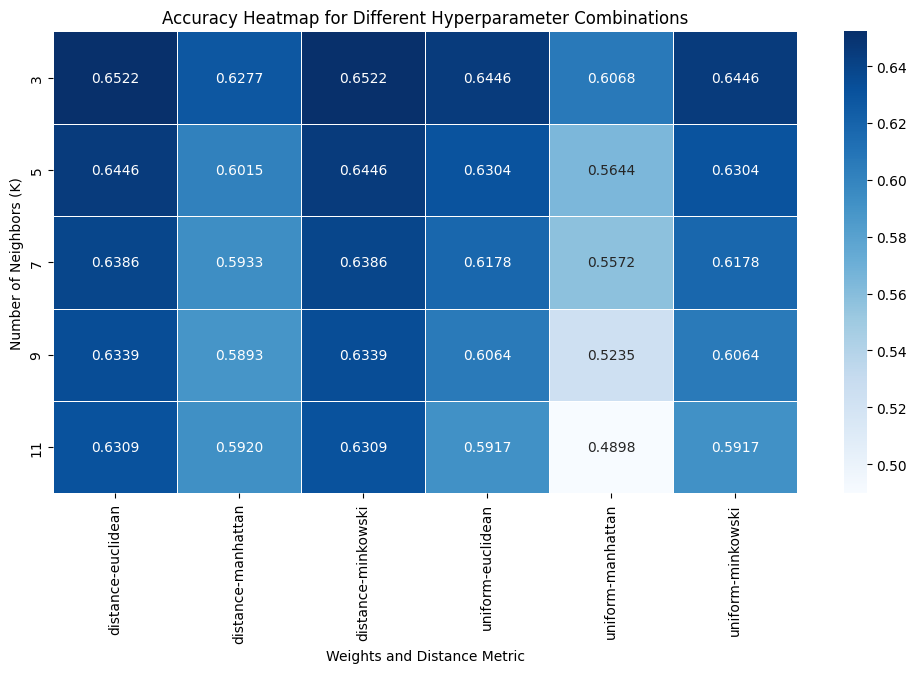

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame(grid_search.cv_results_)
results_pivot = results.pivot_table(values='mean_test_score', index='param_n_neighbors',
                                    columns=['param_weights', 'param_metric'])
plt.figure(figsize=(12, 6))
sns.heatmap(results_pivot, annot=True, fmt=".4f", cmap="Blues", linewidths=0.5)
plt.title("Accuracy Heatmap for Different Hyperparameter Combinations")
plt.xlabel("Weights and Distance Metric")
plt.ylabel("Number of Neighbors (K)")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.67


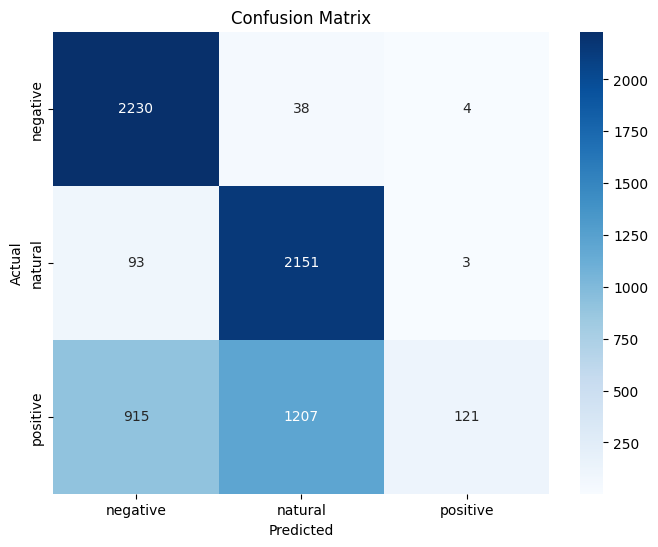

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cmknn = confusion_matrix(y_test, y_pred1)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cmknn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'natural', 'positive'],
            yticklabels=['negative', 'natural', 'positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
from sklearn.metrics import classification_report

crknn = classification_report(y_test, y_pred1)

print("Classification Report:\n",classification_report(y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.98      0.81      2272
           1       0.63      0.96      0.76      2247
           2       0.95      0.05      0.10      2243

    accuracy                           0.67      6762
   macro avg       0.76      0.66      0.56      6762
weighted avg       0.76      0.67      0.56      6762



## Logistic Regression

In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.logspace(-4, 4, 50)}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)

print(best_model.best_estimator_)
print("Best hyperparameters:", best_model.best_params_)
print("Best accuracy:", best_model.best_score_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=np.float64(10000.0), random_state=0)
Best hyperparameters: {'C': np.float64(10000.0)}
Best accuracy: 0.9361040576129407
The mean accuracy of the model is: 0.9439514936409347


In [28]:
results = pd.DataFrame(clf.cv_results_)
top_results = results[['param_C', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False).head(100)
top_results

,param_C,mean_test_score
49,10000.000000,0.936104
47,4714.866363,0.933737
48,6866.488450,0.933639
46,3237.457543,0.932899
45,2222.996483,0.930829
44,1526.417967,0.930631
42,719.685673,0.926934
43,1048.113134,0.926835
41,494.171336,0.924222
40,339.322177,0.922053


In [29]:
logreg = LogisticRegression(C=10000, random_state=0)
logreg.fit(X_train, y_train)
y_pred2 = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


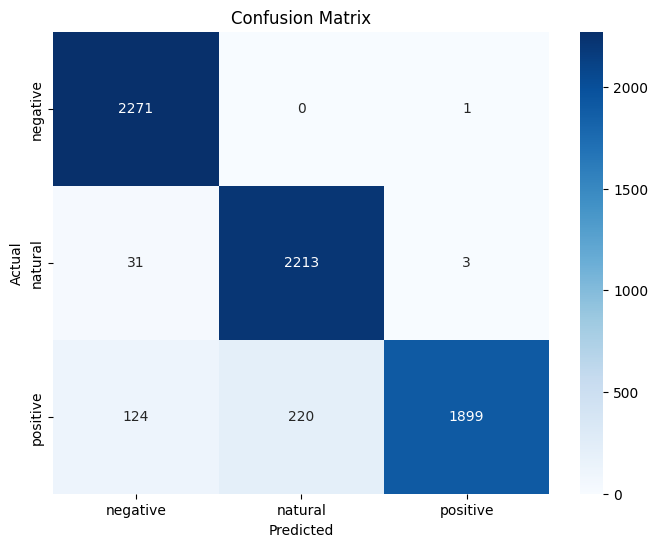

In [31]:
# Plot the confusion matrix
cmlr = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cmlr, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'natural', 'positive'],
            yticklabels=['negative', 'natural', 'positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [32]:
clr = classification_report(y_test, y_pred2)
print("Classification Report:\n",classification_report(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2272
           1       0.91      0.98      0.95      2247
           2       1.00      0.85      0.92      2243

    accuracy                           0.94      6762
   macro avg       0.95      0.94      0.94      6762
weighted avg       0.95      0.94      0.94      6762



# **Compare 2 Models**



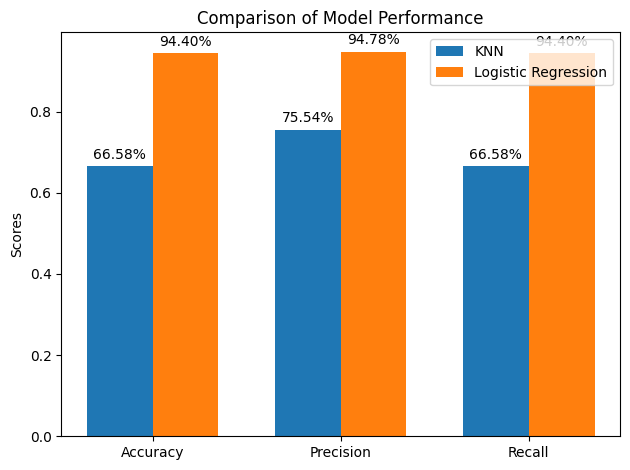

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score


knn_accuracy = accuracy_score(y_test, y_pred1)
knn_precision = precision_score(y_test, y_pred1, average='weighted')
knn_recall = recall_score(y_test, y_pred1, average='weighted')


lr_accuracy = accuracy_score(y_test, y_pred2)
lr_precision = precision_score(y_test, y_pred2, average='weighted')
lr_recall = recall_score(y_test, y_pred2, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall']
knn_scores = [knn_accuracy, knn_precision, knn_recall]
lr_scores = [lr_accuracy, lr_precision, lr_recall]
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, knn_scores, width, label='KNN')
rects2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# **Evaluation**
> ลองนำ model ที่ดีที่สุดมาทดสอบ

In [34]:
stop_words = set([
    'yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself',
    'here', 'your', 'each', 'we', 'he', 'my', "you've", 'having', 'in', 'both',
    'for', 'themselves', 'are', 'them', 'other', 'and', 'an', 'during', 'their',
    'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 'what',
    'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that',
    'were', "don't", 'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they',
    'to', 'too', "should've", 'has', 'before', 'into', 'yours', "it's", 'do',
    'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 'about',
    'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or',
    'doing', 'such', 'his', 'himself', 'ourselves',  'was', 'through', 'out',
    'below', 'own', 'myself', 'theirs', 'me', 'why', 'once',  'him', 'than',
    'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it', 'at', 'after',
    'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had',
    'under', 'over','again', 'where', 'those', 'then', "you're", 'i', 'because',
    'does', 'all'
])

def predict_sentiment(text):
  # Preprocess the input text
  text = remove_numbers(text)
  text = remove_punctuation(text)
  text = remove_extra_white_spaces(text)
  text = remove_nonEng(text)
  text = remove_stopwords(text)
  text = lemmatizing(text)

  # Transform the text using the fitted TF-IDF vectorizer
  text_tfidf = tfidf_vectorizer.transform([text])

  # Make the prediction using the trained logistic regression model
  prediction = logreg.predict(text_tfidf)[0]

  # Inverse transform the prediction to get the original sentiment label
  sentiment = label_encoder.inverse_transform([prediction])[0]
  return sentiment

# Example usage:
test_texts = [
    "Worth the price. This is a nice one.",
    "The quality of this item is terrible. I'm very disappointed.",
    "It's an okay product. Nothing special."
]

for text in test_texts:
    predicted_sentiment = predict_sentiment(text)
    print(f"Text: '{text}'")
    print(f"Predicted Sentiment: {predicted_sentiment}")
    print("-" * 20)

Text: 'Worth the price. This is a nice one.'
Predicted Sentiment: positive
--------------------
Text: 'The quality of this item is terrible. I'm very disappointed.'
Predicted Sentiment: negative
--------------------
Text: 'It's an okay product. Nothing special.'
Predicted Sentiment: neutral
--------------------


ถือว่าทำนายผลลัพธ์ได้น่าพึงพอใจ 😃